# This document is a report suggesting how to maximise the profit of our next movie project considering the current budget constraint.


In [1]:
import os
for root,_,filename in os.walk('/kaggle/input'):
    for filename in filename:
        print(os.path.join(root,filename))
    
    

/kaggle/input/movie-data-imdb/movie_metadata.csv


In [2]:
#Importing all the relevent modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
import re

In [3]:
df_raw = pd.read_csv('/kaggle/input/movie-data-imdb/movie_metadata.csv')
pd.set_option('max_columns', None)
df_raw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
#this creats a new column 'profit' in the dataframe
df_raw['profit'] =df_raw['gross'] - df_raw['budget']

In [5]:
#data cleaning
df_raw.dropna(inplace = True)
df_raw.drop_duplicates(inplace= True)
df_raw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


In [6]:
#To just check the summary of the data available to us
df_raw.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
count,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3.723000e+03,3.723000e+03,3723.000000,3723.000000,3723.000000,3.723000e+03,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3.723000e+03
mean,167.040559,110.263497,809.864357,765.010207,7743.335751,5.248034e+07,1.055543e+05,11494.966694,1.376041,335.897663,4.623049e+07,2002.965351,2009.926403,6.465673,2.110682,9299.497717,6.249847e+06
std,123.345135,22.678325,3076.624412,1868.841589,15557.953218,6.980333e+07,1.515651e+05,19113.274232,2.045134,411.078619,2.269511e+08,9.892253,4531.151446,1.053644,0.353879,21426.654643,2.307904e+08
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000,-1.221330e+10
25%,77.000000,96.000000,11.000000,194.000000,744.500000,8.124330e+06,1.959850e+04,1907.000000,0.000000,109.000000,1.000000e+07,1999.000000,383.500000,5.900000,1.850000,0.000000,-1.045723e+07
50%,138.000000,106.000000,63.000000,436.000000,1000.000000,3.005003e+07,5.397700e+04,4050.000000,1.000000,209.000000,2.500000e+07,2004.000000,683.000000,6.600000,2.350000,226.000000,1.590010e+06
75%,224.000000,120.000000,235.000000,690.000000,13000.000000,6.690181e+07,1.285240e+05,16232.500000,2.000000,398.000000,5.000000e+07,2010.000000,975.000000,7.200000,2.350000,11000.000000,2.575094e+07
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000,5.235058e+08


Let us have a quick check on the correlation between different numerical data available in the given imdb dataset. From this we can get a rough idea that only the **gross** and **num_voted_users** have considerable correlation with the profit among other numerical parameters. But the **num_voted_users** we are not considering for the analysis because the votes are made after the movie is seen by the user and is an external parameter which we are not able to control.

In [7]:
df_raw.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.227619,0.175715,0.245440,0.165648,0.460797,0.591586,0.233781,-0.035603,0.562596,0.103921,0.420184,0.251119,0.349825,0.179809,0.703579,0.037177
duration,0.227619,1.000000,0.180397,0.120776,0.082901,0.242610,0.338953,0.117736,0.027522,0.352083,0.067380,-0.131689,0.126651,0.367388,0.153353,0.212977,0.007119
director_facebook_likes,0.175715,0.180397,1.000000,0.120584,0.090467,0.139729,0.302766,0.120076,-0.047577,0.218876,0.018105,-0.045718,0.117858,0.193125,0.037171,0.162641,0.024457
actor_3_facebook_likes,0.245440,0.120776,0.120584,1.000000,0.252450,0.281238,0.257632,0.485596,0.104853,0.200485,0.038207,0.116479,0.550328,0.064187,0.047918,0.259922,0.047490
actor_1_facebook_likes,0.165648,0.082901,0.090467,0.252450,1.000000,0.142577,0.178009,0.946075,0.055769,0.121393,0.016027,0.095997,0.390411,0.092927,0.056816,0.128804,0.027363
gross,0.460797,0.242610,0.139729,0.281238,0.142577,1.000000,0.622714,0.227955,-0.034389,0.545656,0.098318,0.053163,0.243977,0.215510,0.065903,0.358630,0.205771
num_voted_users,0.591586,0.338953,0.302766,0.257632,0.178009,0.622714,1.000000,0.243834,-0.035822,0.779191,0.065398,0.023488,0.239126,0.482583,0.087079,0.514855,0.124032
cast_total_facebook_likes,0.233781,0.117736,0.120076,0.485596,0.946075,0.227955,0.243834,1.000000,0.078250,0.176231,0.027670,0.126650,0.640366,0.105397,0.069464,0.199995,0.041736
facenumber_in_poster,-0.035603,0.027522,-0.047577,0.104853,0.055769,-0.034389,-0.035822,0.078250,1.000000,-0.082542,-0.022107,0.069622,0.070261,-0.067010,0.019358,0.012960,0.011339
num_user_for_reviews,0.562596,0.352083,0.218876,0.200485,0.121393,0.545656,0.779191,0.176231,-0.082542,1.000000,0.070271,0.020059,0.184704,0.325026,0.098260,0.368575,0.095933


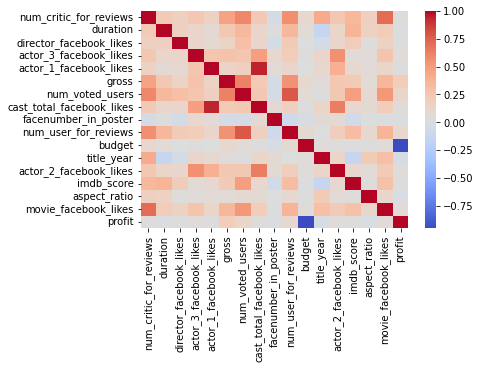

In [8]:
sn.heatmap(df_raw.corr(),cmap = 'coolwarm')
plt.show()

Now we have a rough idea on which all columns to be dropped from observing the correlation heatmap.

In [9]:
to_drop = ['color', 'duration', 'num_critic_for_reviews','num_voted_users','facenumber_in_poster','movie_imdb_link','num_user_for_reviews','country','title_year','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_name','actor_3_name','actor_1_facebook_likes','content_rating','director_facebook_likes','language','cast_total_facebook_likes','plot_keywords']

In [10]:
#New dataframe is created by dropping columns
df_raw1 = df_raw.drop(to_drop, axis = 1)
df_raw1.isnull().sum()

director_name    0
gross            0
genres           0
movie_title      0
budget           0
imdb_score       0
profit           0
dtype: int64

Let us make sure there are not negative entries in the `budget` and `gross`

In [11]:
print(len(df_raw1[df_raw1['budget']<=0]))
print(len(df_raw1[df_raw1['gross']<=0]))

0
0


Let us understand how the gross, budget and profit are related to each other by making the scatter plot between these features.


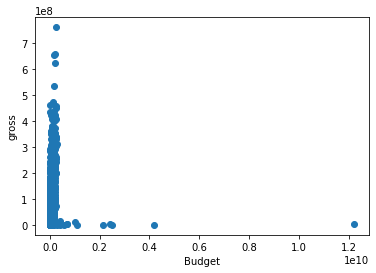

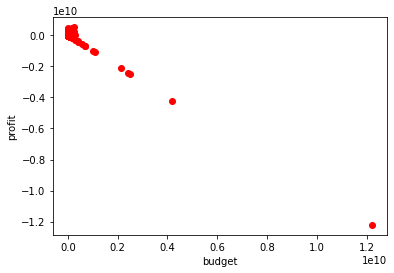

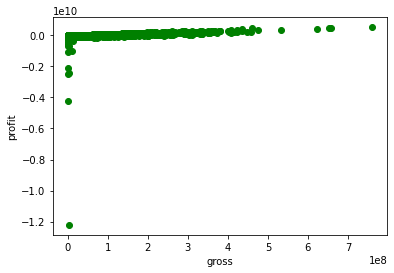

In [12]:
plt.scatter(df_raw1['budget'],df_raw1['gross'])# plot between budget and gross
plt.xlabel('Budget')
plt.ylabel('gross')
plt.show()
plt.scatter(df_raw1['budget'],df_raw1['profit'] , c = 'red')#plot between budget and profit
plt.xlabel('budget')
plt.ylabel('profit')
plt.show()
plt.scatter(df_raw1['gross'],df_raw1['profit'], c= 'green' )#plot between gross and profit
plt.xlabel('gross')
plt.ylabel('profit')
plt.show()


From the above graph we can make some important inference such as: 
 * As the budget increases profit doesn't increase
 * Profit has a positive correlation with the gross
 * The gross doesn't depend on the budget
 
Also from the graph we can identify that some points are lying on the extrems of the graph, alienated from the other group of points. These are outlieres in the data.


Let us find out if we can use any of the most common genre type available in the available data set.

In [13]:
dict_ ={}
#Function to create a frequency distribution of the different genres available in the dataset.
def count_function(dataframe): 
  for i in dataframe['genres']:
    dict_[i] = dict_.get(i,0)+1
  return dict_

The Genre given below are the most common genres in the available data set.

In [14]:
 genre_count = count_function(df_raw1)
 genre_count
 dict_ = {}#to make dict_ empty again, otherwise the count will increase each time you run the cell
 import nltk
 from nltk.probability import FreqDist
 genre_count = FreqDist(genre_count) #could have taken the most_common genre without using FreqDist
 most_common_genres = genre_count.most_common(10)
 most_common_genres #To find the most common genres in the available data set
 df=pd.DataFrame(most_common_genres, columns = ['Top_frequent_Genre','Number_of_Movies'])
 df

,Top_frequent_Genre,Number_of_Movies
0,Comedy|Drama|Romance,147
1,Drama,140
2,Comedy,137
3,Comedy|Drama,137
4,Comedy|Romance,131
5,Drama|Romance,114
6,Crime|Drama|Thriller,81
7,Action|Crime|Thriller,55
8,Action|Crime|Drama|Thriller,50
9,Action|Adventure|Sci-Fi,46


Let us analyse the budget of these most frequent films

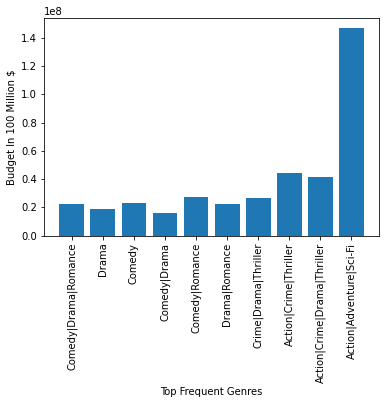

In [15]:
#in the next line column value aggregation is done (with groupby) and mean is calculated so that 'topgenseries' dataframe can be created
topgenreseries = df_raw1.groupby('genres')[['budget','imdb_score','gross','profit']].mean()
df2=pd.DataFrame(topgenreseries['budget'][df['Top_frequent_Genre']])
df2
plt.bar(df2.index,df2['budget'])
plt.xticks(rotation = 90)
plt.xlabel('Top Frequent Genres')
plt.ylabel('Budget In 100 Million $')
plt.show()
#plt.bar(df2.index,df2['budget'])

From the above analysis it is obvious that the most frequent genres in the availabe data set are out of budget as our budget has a cap at 1,500,000. But incase we can avail more funding, there is a good possibility of taking succesful films in these genres. Now, let us give the current budget limit to the film assuming that we are using the whole budget only for a single film

In [16]:
max_budget = 1500000
df_final=df_raw1[df_raw1['budget']<= max_budget]
df_final.head()

,director_name,gross,genres,movie_title,budget,imdb_score,profit
1281,Martin Scorsese,32645.0,Crime|Drama|Romance|Thriller,Mean Streets,500000.0,7.4,-467355.0
2242,Alfred Hitchcock,32000000.0,Horror|Mystery|Thriller,Psycho,806947.0,8.5,31193053.0
2420,John Carpenter,21378000.0,Fantasy|Horror,The Fog,1000000.0,6.8,20378000.0
2492,John Carpenter,47000000.0,Horror|Thriller,Halloween,300000.0,7.9,46700000.0
3278,Tobe Hooper,30859000.0,Horror|Thriller,The Texas Chain Saw Massacre,83532.0,7.5,30775468.0


from further analysis we can get the following data frame which shows the genres which have mean budget less than our current budget limit

In [17]:
#in the next line column value aggregation is done (with groupby) and mean is calculated so that 'budget_genres' dataframe can be created
budget_genres = df_final.groupby('genres')[['budget','imdb_score','gross','profit']].mean() 
budget_genres = budget_genres.sort_values('profit', ascending = False)
budget_genres.head(8)




,budget,imdb_score,gross,profit
genres,,,,
Comedy|Drama|Music,8.385000e+05,6.850000,62000000.00,6.116150e+07
Fantasy|Horror|Mystery|Thriller,1.500000e+06,6.800000,53991137.00,5.249114e+07
Horror,5.892857e+05,6.042857,45711857.00,4.512257e+07
Adventure|Family|Romance,5.000000e+05,6.100000,39552600.00,3.905260e+07
Horror|Thriller,1.734128e+05,7.000000,35695163.80,3.552175e+07
Horror|Mystery|Thriller,1.064237e+06,7.000000,34447680.75,3.338344e+07
Adventure|Biography|Drama|Horror|Thriller,5.000000e+05,5.700000,30500882.00,3.000088e+07
Drama|Sport,5.920000e+05,6.700000,26057639.60,2.546564e+07


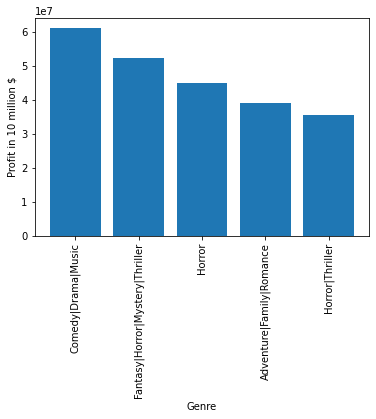

In [18]:
%matplotlib inline
from matplotlib.pyplot import figure
plt.bar(budget_genres.index[:5] , budget_genres['profit'][:5]) # To show the profit of top 5 genres within the budget limit
plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Profit in 10 million $')
plt.show()

By seeing this output we might be misguded that Comedy|Drama|Music genre is the best genre to focus out next film on. However, by taking a closer look we can understand that there is only two such film data in the final dataset

In [19]:
df_final[df_final['genres']== 'Comedy|Drama|Music']

,director_name,gross,genres,movie_title,budget,imdb_score,profit
4546,Russ Meyer,9000000.0,Comedy|Drama|Music,Beyond the Valley of the Dolls,900000.0,6.2,8100000.0
4674,George Lucas,115000000.0,Comedy|Drama|Music,American Graffiti,777000.0,7.5,114223000.0


So we have to further analyse how many movies are there in each genre. The more films we have in each genre, better it is to come up with a solid argument

In [20]:
genre_count2 = count_function(df_final)
dict_ = {} # to make the dict_ empty, other wise if u run the cell again the count will inrease
list_final=[(i, genre_count2[i]) for i in budget_genres.index]
# The code below is to convert the above list into a dictionary form
dict_1 = {}
for i in list_final:
  dict_1[i[0]] = i[1]
dict_1
dict_1 = FreqDist(dict_1) #To get the most frequent genres easily, converted dictionary to a frequency distribution
dict_1.most_common(15)# Most common 15 genres in the available budget
df3 = pd.DataFrame(dict_1.most_common(15), columns = ['Genres','Number of movies'])
df3



,Genres,Number of movies
0,Drama,26
1,Comedy|Drama,17
2,Comedy|Drama|Romance,16
3,Comedy,8
4,Drama|Romance,8
5,Crime|Drama|Thriller,8
6,Comedy|Romance,8
7,Horror,7
8,Documentary,6
9,Horror|Thriller,5


By having a closer look at `budget_genres` and `df3` the films which contains a **Horror** element is making more profit and we also have decent number of films available in the final data which have this **Horror** factor in it. Now let us find the genre of films with this factor.

In [21]:
list_2 = []
for i in df3['Genres']:
  if re.findall(r'Horror',i) == ['Horror']:
    list_2.append(i)
list_2

['Horror', 'Horror|Thriller', 'Horror|Mystery|Thriller', 'Fantasy|Horror']

From the above list we can find that **Horror** and **Horror** thriller is the common genre in both `budget_genres` and `df3`

In [22]:
df_horror = budget_genres.loc[['Horror','Horror|Thriller'],:]
df_horror

,budget,imdb_score,gross,profit
genres,,,,
Horror,589285.714286,6.042857,45711857.0,4.512257e+07
Horror|Thriller,173412.800000,7.000000,35695163.8,3.552175e+07


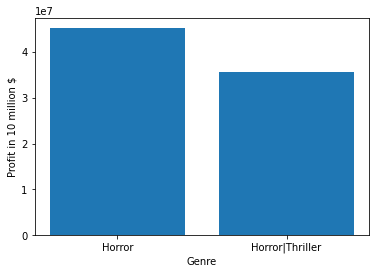

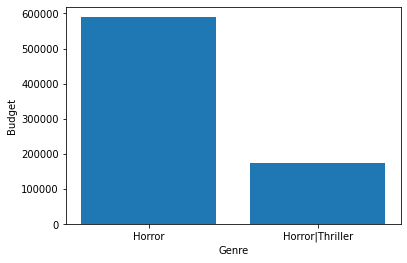

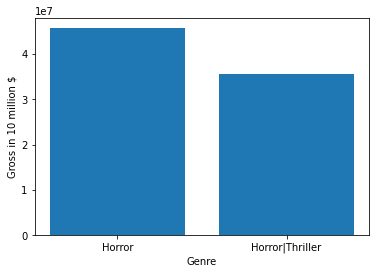

In [23]:
%matplotlib inline
plt.bar(df_horror.index, df_horror['profit']) #to plot between genre and profit
plt.xlabel('Genre')
plt.ylabel('Profit in 10 million $')
plt.show()
plt.bar(df_horror.index,df_horror['budget']) #to plot between genre and budget
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.show()
plt.bar(df_horror.index,df_horror['gross']) #to plot between genre and gross 
plt.xlabel('Genre')
plt.ylabel('Gross in 10 million $')
plt.show()

In [24]:
profit_diff = df_horror.loc['Horror'][3] - df_horror.loc['Horror|Thriller'][3]
budget_diff = df_horror.loc['Horror'][0] - df_horror.loc['Horror|Thriller'][0]
print('The average profit differnce between Horror and Horror|Thriller genre is {}'.format(profit_diff))
print('The average budget differnce between Horror and Horror|Thriller genre is {}'.format(budget_diff))

The average profit differnce between Horror and Horror|Thriller genre is 9600820.285714284
The average budget differnce between Horror and Horror|Thriller genre is 415872.91428571433


From the above analysis, assuming we can make only one film, I propose making a film in the **Horror** genre. However, we still have to do the Hypothesis testing to find if the higher profit shown by the **Horror** movie is statistically significant

  # Hypothesis testing


If horror movies make higher profit, then average profit will be grater for horror movies.

* $H_0$ : Average profit for horror movies are same as average of other genre
  $U_1$ - $U_2$ = $0$

* $H_1$ : Average profit for horror movies are greater than average of other genre $U_1$ - $U_2$ > $0$

Here the two groups for which we do the hypothesis testing is for `df_final1['profit']` and `df_final2['profit']`

Since here the sample size is not high enough to use a z-test, we will use t-test. Also, the sample size of both the groups which we consider are different, so we cannot assume same varience (ie, we cannot use student's t- test). We will use the Welch's t-test

In [25]:
df_final1 = df_final[df_final['genres']!= 'Horror']
df_final2 = df_final[df_final['genres'] =='Horror']
print('The mean profit for all genre other than Horror = {}'.format(np.mean(df_final1['profit'])))
print('The mean profit of Horror genre = {}'.format(np.mean(df_final2['profit'])))

The mean profit for all genre other than Horror = 5480800.32718894
The mean profit of Horror genre = 45122571.28571428


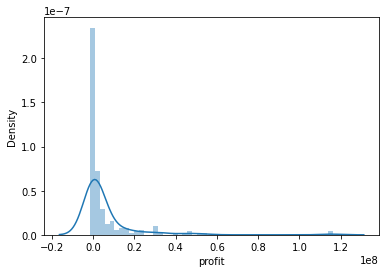

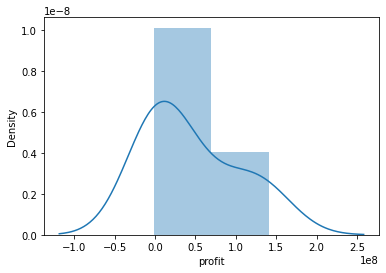

In [26]:
import warnings
warnings.filterwarnings("ignore") #to ignore the futurewarning of distplot
sn.distplot(df_final1['profit']) #for getting the distribution plot for 'profit'from genres other than horror
plt.show()
sn.distplot(df_final2['profit'])#for getting the distribution plot for 'profit' from Horror genre
plt.show()


In [27]:
def hypothesis_testing(data1,data2):
  alpha = [0.01, 0.05, 0.1] #common values for significance level
  from scipy.stats import ttest_ind
  stat,p_value = ttest_ind(data1,data2, equal_var= False)
  print(p_value/2)#since we are doing single tail test, we need only p_value/2
  for i in alpha:
    if p_value/2 < i:
      print('Reject the Null Hypothesis H0 at {} % significance level'.format(i*100))
      break
    else:
      print('Failed to reject the Null Hypothesis H0 at {} % significance level'.format(i*100))



In [28]:
hypothesis_testing(df_final2['profit'],df_final1['profit'])


0.0601730681113145
Failed to reject the Null Hypothesis H0 at 1.0 % significance level
Failed to reject the Null Hypothesis H0 at 5.0 % significance level
Reject the Null Hypothesis H0 at 10.0 % significance level


From the above hypothesis testing, we can say that making a movie in **Horror** genre can give higher profit than average of other movie genre at a confidence interval of 90%

 # Summary

An exploritory data analysis is done on the available data set to figure out which movie genre we have to make next for maximising the profit within the given budget. First I have done the data cleaning and wrangling and estimated rough correlation between features so that we can eliminate irrelevant features.Then by further analysis I have understood that many of the popular genre was out of our reach because of the budget limitation.

The data is further analysed and the top genres which makes high profit was figured out. However, many such genres had only limited number of films in it making the analysis based only on such small sample size non-reliable. To overcome this, movie genres which has considerable sample size as well as high profit was found. From those movie genres **Horror** movie genre is proposed because of its significantly high returns over the budget.

Finally a hypothesis testing is done and I figured out that I could propose the **Horror** movie genre at a 90% confidence interval.



